## Using alphavantage API

In [1]:
# import modules
import pandas     as pd
import requests   as r
import json
import mplfinance as mpf
import numpy      as np
import logging
from sqlalchemy import create_engine

In [2]:
for handler in logging.root.handlers[:]:

    logging.root.removeHandler(handler)

# login configuration
logging.basicConfig(
    filename = 'logs.txt', 
    format='%(asctime)s %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    filemode='w',
    level = logging.DEBUG
)

# create logger
logger = logging.getLogger(__name__)
var = '170'

In [3]:
# test
logger.debug('%s var %s', 'This message should go to the log file', var)
logger.info('So should this')
logger.warning('And this, too')
logger.error('And non-ASCII stuff, too, like Øresund and Malmö')


## Using alphavantage

In [22]:
# credentials and parameters
api_key = 'PU5AQEKAUQ0NQN91'
stock_name = 'AAPL'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={stock_name}&&interval=5min&apikey={api_key}'


# calling api
response = r.get(url)

if response.status_code == 200:

    print(f'Connected: {response.status_code}')

else:

    print('Not Connected: {response.status_code}')

data = response.json()

try:
    df = pd.DataFrame.from_dict( data['Time Series (5min)'], orient = 'index' )

except Exception as e:

    print(f'Erro:{e}')


    
    

display(df)
df.to_excel('stocks.xlsx')

Connected: 200


,1. open,2. high,3. low,4. close,5. volume
2024-12-03 19:55:00,242.9600,243.0000,242.8700,242.9350,8813
2024-12-03 19:50:00,242.9681,242.9700,242.9300,242.9600,1523
2024-12-03 19:45:00,242.9000,242.9700,242.8400,242.9313,4167
2024-12-03 19:40:00,242.8700,242.9500,242.8200,242.8950,1295
2024-12-03 19:35:00,242.7750,242.9600,242.7450,242.8200,2146
...,...,...,...,...,...
2024-12-03 12:00:00,241.4100,241.6350,241.3600,241.4801,315139
2024-12-03 11:55:00,241.4901,241.5000,241.3300,241.4100,259819
2024-12-03 11:50:00,241.3833,241.5400,241.3200,241.4950,353097
2024-12-03 11:45:00,241.2200,241.4150,241.1950,241.3850,294848


## Using polygon API

In [8]:
# credentials
api_key = 'EVETjm2IfJw2woLluVNJ55Kynkvzw17F'

headers = {'Authorization' : f'Bearer {api_key}' }

ticker = 'AAPL'

start_date = '2024-09-01'

end_date = '2024-11-29'

# api endpoint
url = f'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date}/{end_date}'

# calling api
response = r.get(url, headers = headers)


if response.status_code == 200:

    print(f"Connected: {response.status_code}")
else:

    print( f"Not connected: {response.status_code}" )


data = json.loads(response.text)

if data['queryCount'] == 0:

    print('Not Found')
else:
    print('Data retrieved!')

columns = [
    'volume',
    'weighted_average_price',
    'open_price',
    'close_price',
    'highest_price',
    'lowest_price',
    'Unix_Msec_timestamp',
    'number_of_transactions'
]

df = pd.DataFrame(data['results'])

df.columns = columns

df['datetime'] = pd.to_datetime( df['Unix_Msec_timestamp'], unit = 'ms'  )

df.to_excel(f'{ticker}_nov.xlsx', index = False)
display(df)


Connected: 200
Data retrieved!


,volume,weighted_average_price,open_price,close_price,highest_price,lowest_price,Unix_Msec_timestamp,number_of_transactions,datetime
0,49286866.0,223.8154,228.550,222.77,229.0000,221.1700,1725336000000,813544,2024-09-03 04:00:00
1,42699700.0,219.9426,221.660,220.85,221.7800,217.4800,1725422400000,679903,2024-09-04 04:00:00
2,34772036.0,223.1330,221.625,222.38,225.4800,221.5200,1725508800000,587991,2024-09-05 04:00:00
3,45965359.0,221.6809,223.950,220.82,225.2400,219.7700,1725595200000,663919,2024-09-06 04:00:00
4,65865433.0,219.3513,220.820,220.91,221.2700,216.7100,1725854400000,945401,2024-09-09 04:00:00
...,...,...,...,...,...,...,...,...,...
58,35459680.0,229.6738,228.060,229.87,230.7199,228.0600,1732251600000,380543,2024-11-22 05:00:00
59,79840237.0,232.2878,231.460,232.87,233.2450,229.7400,1732510800000,510511,2024-11-25 05:00:00
60,44049660.0,234.7366,233.330,235.06,235.5700,233.3300,1732597200000,449908,2024-11-26 05:00:00
61,31604402.0,234.7888,234.465,234.93,235.6900,233.8101,1732683600000,339772,2024-11-27 05:00:00


## VWAP

In [29]:
df = pd.read_csv(f'{ticker}_nov.csv')

vwap = ( df['weighted_average_price'] * df['volume'] ) / df['volume']

df['vwap'] = vwap

df['datetime'] = pd.to_datetime( df['Unix_Msec_timestamp'], unit = 'ms'  )

df.set_index('datetime', inplace = True)

df.head()


,volume,weighted_average_price,open_price,close_price,highest_price,lowest_price,Unix_Msec_timestamp,number_of_transactions,vwap
datetime,,,,,,,,,
2024-09-03 04:00:00,49286866.0,223.8154,228.550,222.77,229.00,221.17,1725336000000,813544,223.8154
2024-09-04 04:00:00,42699700.0,219.9426,221.660,220.85,221.78,217.48,1725422400000,679903,219.9426
2024-09-05 04:00:00,34772036.0,223.1330,221.625,222.38,225.48,221.52,1725508800000,587991,223.1330
2024-09-06 04:00:00,45965359.0,221.6809,223.950,220.82,225.24,219.77,1725595200000,663919,221.6809
2024-09-09 04:00:00,65865433.0,219.3513,220.820,220.91,221.27,216.71,1725854400000,945401,219.3513


## ETR

In [30]:

etr = ( ( df['close_price'] - df['open_price'] ) /  df['open_price'] )  * 100

df['ERT'] = etr

df

,volume,weighted_average_price,open_price,close_price,highest_price,lowest_price,Unix_Msec_timestamp,number_of_transactions,vwap,ERT
datetime,,,,,,,,,,
2024-09-03 04:00:00,49286866.0,223.8154,228.550,222.77,229.0000,221.1700,1725336000000,813544,223.8154,-2.528987
2024-09-04 04:00:00,42699700.0,219.9426,221.660,220.85,221.7800,217.4800,1725422400000,679903,219.9426,-0.365425
2024-09-05 04:00:00,34772036.0,223.1330,221.625,222.38,225.4800,221.5200,1725508800000,587991,223.1330,0.340666
2024-09-06 04:00:00,45965359.0,221.6809,223.950,220.82,225.2400,219.7700,1725595200000,663919,221.6809,-1.397633
2024-09-09 04:00:00,65865433.0,219.3513,220.820,220.91,221.2700,216.7100,1725854400000,945401,219.3513,0.040757
...,...,...,...,...,...,...,...,...,...,...
2024-11-22 05:00:00,35459680.0,229.6738,228.060,229.87,230.7199,228.0600,1732251600000,380543,229.6738,0.793651
2024-11-25 05:00:00,79840237.0,232.2878,231.460,232.87,233.2450,229.7400,1732510800000,510511,232.2878,0.609177
2024-11-26 05:00:00,44049660.0,234.7366,233.330,235.06,235.5700,233.3300,1732597200000,449908,234.7366,0.741439


## Ploting Candlestick chart

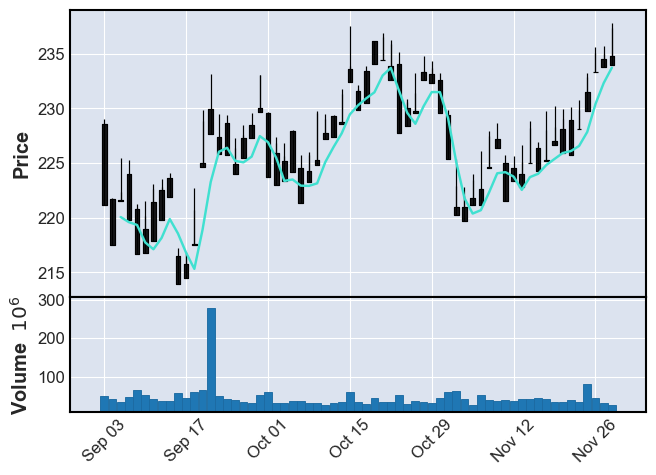

In [32]:

df_cs = df[['open_price','close_price','highest_price','lowest_price','volume']]

df_cs.columns = ['Open','High','Low','Close','Volume']

mpf.plot( df_cs, type = 'candle', mav=(3), volume=True )


In [102]:

def moving_average(df, column_price , window_size):
    
    arr = df[column_price].to_numpy()

    window_size = window_size

    i = 0
    moving_average = []

    while i < len(arr) - window_size + 1:
    
        window = arr[i : i + window_size ]

        moving_avg_value = round( sum(window)/window_size,2)

        moving_average.append( moving_avg_value )

        i += 1

    moving_avg_result = [np.nan] * ( window_size - 1 )  + moving_average

    df['moving_average'] = moving_avg_result
    
    
    return df



In [103]:
df_2 = moving_average( df, 'weighted average price' , 4 )
df_2

,volume,weighted average price,open price,close price,highest price,lowest price,Unix Msec timestamp,number of transactions,vwap,moving_average
datetime,,,,,,,,,,
2024-09-03 04:00:00,49286866.0,223.8154,228.550,222.77,229.0000,221.1700,1725336000000,813544,223.8154,NaN
2024-09-04 04:00:00,42699700.0,219.9426,221.660,220.85,221.7800,217.4800,1725422400000,679903,219.9426,NaN
2024-09-05 04:00:00,34772036.0,223.1330,221.625,222.38,225.4800,221.5200,1725508800000,587991,223.1330,NaN
2024-09-06 04:00:00,45965359.0,221.6809,223.950,220.82,225.2400,219.7700,1725595200000,663919,221.6809,222.14
2024-09-09 04:00:00,65865433.0,219.3513,220.820,220.91,221.2700,216.7100,1725854400000,945401,219.3513,221.03
...,...,...,...,...,...,...,...,...,...,...
2024-11-22 05:00:00,35459680.0,229.6738,228.060,229.87,230.7199,228.0600,1732251600000,380543,229.6738,228.72
2024-11-25 05:00:00,79840237.0,232.2878,231.460,232.87,233.2450,229.7400,1732510800000,510511,232.2878,229.62
2024-11-26 05:00:00,44049660.0,234.7366,233.330,235.06,235.5700,233.3300,1732597200000,449908,234.7366,231.29


In [149]:

def cum_avg(df, column):
    
    arr = df[column].to_numpy()

    i = 1

    cum_avg = []

    cum_sum = np.cumsum(arr)

    while i < len(arr) + 1:
            
        cum_avg_result = round( cum_sum[i-1] / i, 2 )

        cum_avg.append(cum_avg_result)

        i += 1

    moving_avg_result = cum_avg

    df['moving_avg_result'] = moving_avg_result
    
    return df

In [13]:
df_3 = cum_avg(df_2, 'weighted average price')
df_3.columns

NameError: name 'cum_avg' is not defined

In [77]:
import logging
logging.basicConfig(filename='logs.txt')
logging.getLogger('sqlalchemy.engine').setLevel(logging.INFO)

server = 'DESKTOP-U9M4TSR'

database = 'stock_api'

conn_string= f'mssql+pyodbc://{server}/{ database }?driver=ODBC+Driver+17+for+SQL+Server'

engine= create_engine( conn_string )

df.to_sql( name = 'stock_data' , con = engine , if_exists= 'replace', index = False)


63

In [39]:
from datetime import timedelta
teste = pd.to_datetime('2024-12-03')

result = teste + timedelta(days=1) 
result.strftime('%Y-%m-%d')

'2024-12-04'